In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
import sys
sys.path.append("../") 

from src.eda_plotting import regplot_grid, draw_scatter_plot, swarm_grid
from src.ml.train_evaluate_save_ml_model import TrainEvaluateSaveMlModel
from src.full_factorial_design_space_generator import FullFactorialDesignSpaceGenerator
from src.ml.ml_model_predictor import MlModelPredictor
from src.ml.tsne_visualiser import TSNEVisualiser

In [2]:
df  = pd.read_csv('../data/processed/candy-data-processed.csv')
print('data shape', df.shape)
df.head()

data shape (85, 13)


,CandyName,Chocolate,Fruity,Caramel,PeanutyAlmondy,Nougat,CrispedRiceWafer,Hard,Bar,PluriBus,SugarPercent,PricePercent,WinPercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Categorize the variables
Target          = "WinPercent"
FlavorFeats     = ["Chocolate", "Fruity", "Caramel", "PeanutyAlmondy", "Nougat", "CrispedRiceWafer"]
FormFeats       = ["Hard", "Bar", "PluriBus"]
ContinuousFeats = ["SugarPercent", "PricePercent"]

SelectedFlavourFeats = ["Chocolate", "Fruity", "PeanutyAlmondy", "CrispedRiceWafer"]
SelectedContinuousFeats = ["SugarPercent"]
SelectedFormFeats = ["Hard", "PluriBus"]

SelectedFeatures = SelectedFlavourFeats + SelectedFormFeats + SelectedContinuousFeats
SelectedBooleanFeats    = SelectedFlavourFeats + SelectedFormFeats

In [4]:
lr_model_pipeline = TrainEvaluateSaveMlModel(features=SelectedFeatures, target=Target, data=df, 
                                             plotting=False, verbose=True, 
                                             model_file_name='../outputs/models/lr/model.joblib',
                                             scaler_file_name='../outputs/models/lr/scaler.joblib',
                                             combined_model_file_name='../outputs/models/lr/combined_model.joblib')
lr_model_experiment = lr_model_pipeline.run('linear_reg')

Cross Validation
R2 score [-0.00319052  0.43837583  0.33244571  0.45216261  0.57589005]
MAPE [32.22961578 21.07720724 14.2354573  12.9853045  12.3951422 ]
MAE [11.58497165  8.11124254  8.73891506  7.13547325  7.03605334]
STDAE [13.46975711  9.35941962  8.90768141  8.99646325  9.10738381]
     metric    average  std devs
0  R2 score   0.359137  0.196930
1      MAPE  18.584545  7.496347
2       MAE   8.521331  1.656989
3     STDAE   9.968141  1.757356


In [5]:

coef_df = (
    pd.DataFrame({
        "feature": lr_model_experiment.features,
        "coef": lr_model_experiment.model.coef_,
    })
    .assign(abs_coef=lambda d: d["coef"].abs())
    .sort_values("abs_coef", ascending=False)
    .reset_index(drop=True)
)
coef_df


,feature,coef,abs_coef
0,Chocolate,8.903796,8.903796
1,Fruity,4.690281,4.690281
2,Hard,-3.180550,3.180550
3,PeanutyAlmondy,3.019977,3.019977
4,CrispedRiceWafer,2.210846,2.210846
5,SugarPercent,1.730916,1.730916
6,PluriBus,-1.412968,1.412968


In [6]:
gpr_model_pipeline = TrainEvaluateSaveMlModel(features=SelectedFeatures, target=Target, data=df, 
                                             plotting=False, verbose=True, 
                                             model_file_name='../outputs/models/gpr/model.joblib',
                                             scaler_file_name='../outputs/models/gpr/scaler.joblib',
                                             combined_model_file_name='../outputs/models/gpr/combined_model.joblib',
                                             prediction_data_file_name='../outputs/models/gpr/model_prediction.csv')
gpr_model_experiment = gpr_model_pipeline.run('gpr')

[                                        ] | 0% Completed | 654.50 us

[##########                              ] | 25% Completed | 4.20 s ms

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[#############                           ] | 33% Completed | 4.53 s

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[##########################              ] | 66% Completed | 5.43 s

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001.

[########################################] | 100% Completed | 5.53 s
[                                        ] | 0% Completed | 1.41 ms

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001.

[########################################] | 100% Completed | 726.22 ms
best parameters {'alpha': 0.01, 'kernel': 1**2 + RBF(length_scale=5) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 10, 'normalize_y': True, 'random_state': 123}
best score 0.3239536843832054
Cross Validation


c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001.

R2 score [0.07443447 0.34344629 0.25274524 0.53141949 0.53569027]
MAPE [30.77975576 23.82701345 14.67796626 11.67354518 14.04159755]
MAE [10.42868297  8.88593008  8.9801224   6.4813231   7.82258093]
STDAE [12.39979777  9.72263185  8.92037492  8.32505874  9.6073866 ]
     metric    average  std devs
0  R2 score   0.347547  0.174815
1      MAPE  18.999976  7.197296
2       MAE   8.519728  1.313871
3     STDAE   9.795050  1.396503


c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [7]:
feature_max_dict = {f: df[f].max() for f in SelectedFeatures}
feature_min_dict = {f: df[f].min() for f in SelectedFeatures}
feature_step_dict = {f: 1 for f in SelectedBooleanFeats}
feature_step_dict.update({f: 0.1 for f in SelectedContinuousFeats})
design_space_generator = FullFactorialDesignSpaceGenerator(features=SelectedFeatures,
                                                            feature_max_dict=feature_max_dict,
                                                            feature_min_dict=feature_min_dict,
                                                            feature_step_dict=feature_step_dict)
design_space_generator.compute_design_space_size()

704

In [8]:
design_space =design_space_generator.generate_design_space_df()
design_space['CompoundID'] = ['DS_' + str(i) for i in range(len(design_space))]
design_space.describe()

,Chocolate,Fruity,PeanutyAlmondy,CrispedRiceWafer,Hard,PluriBus,SugarPercent
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.511000
std,0.500355,0.500355,0.500355,0.500355,0.500355,0.500355,0.316453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.511000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.811000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.011000


In [9]:
design_space.loc[:, ['LR_Pred_WinPercent']] = MlModelPredictor().predict(design_space, SelectedFeatures, lr_model_experiment.model, 
                           lr_model_experiment.standard_scaler)

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
design_space.loc[:, 'GPR_Pred_WinPercent'], design_space.loc[:,'GPR_Pred_WinPercent_Std'] = MlModelPredictor().predict(design_space, SelectedFeatures, gpr_model_experiment.model, 
                           gpr_model_experiment.standard_scaler, return_std=True)

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


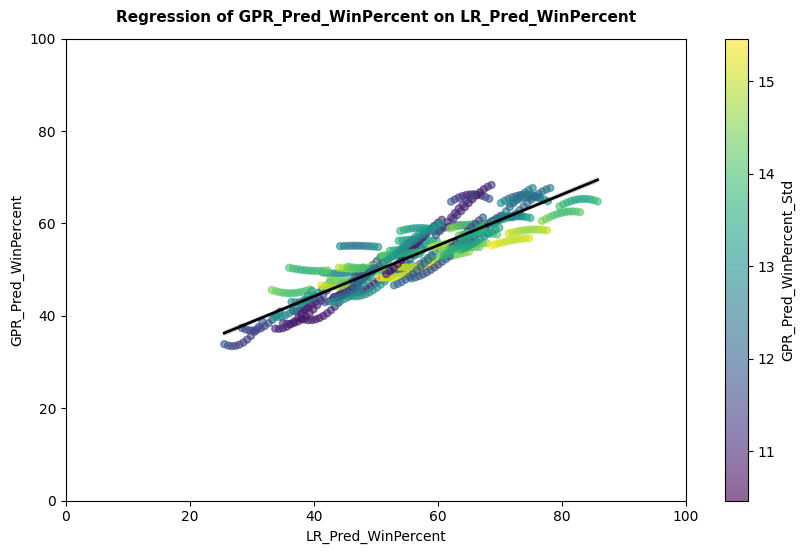

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
draw_scatter_plot(ax, design_space, 'LR_Pred_WinPercent', 'GPR_Pred_WinPercent', 
                  'GPR_Pred_WinPercent_Std', cmap="viridis")

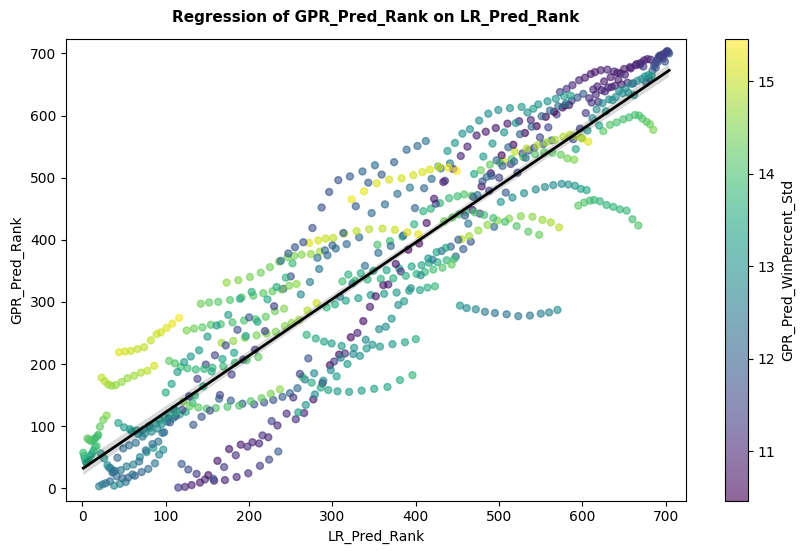

In [12]:
design_space['GPR_Pred_Rank'] = design_space['GPR_Pred_WinPercent'].rank(ascending=False)
design_space['LR_Pred_Rank'] = design_space['LR_Pred_WinPercent'].rank(ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
draw_scatter_plot(ax, design_space, 'LR_Pred_Rank', 'GPR_Pred_Rank', 'GPR_Pred_WinPercent_Std',
                cmap="viridis", x_lim=(-20, design_space.shape[0]+20), y_lim=(-20, design_space.shape[0]+20))

In [13]:
design_space.sort_values(by='GPR_Pred_Rank', inplace=True)
design_space.head(10)

,Chocolate,Fruity,PeanutyAlmondy,CrispedRiceWafer,Hard,PluriBus,SugarPercent,CompoundID,LR_Pred_WinPercent,GPR_Pred_WinPercent,GPR_Pred_WinPercent_Std,GPR_Pred_Rank,LR_Pred_Rank
450,1,0,1,0,0,0,1.011,DS_450,68.670182,68.309699,11.304337,1.0,115.0
449,1,0,1,0,0,0,0.911,DS_449,68.055944,67.923050,11.071736,2.0,123.0
626,1,1,1,0,0,0,1.011,DS_626,78.133016,67.646589,12.609823,3.0,20.0
637,1,1,1,0,0,1,1.011,DS_637,75.303158,67.643606,12.713766,4.0,38.0
448,1,0,1,0,0,0,0.811,DS_448,67.441706,67.403802,10.898350,5.0,131.0
625,1,1,1,0,0,0,0.911,DS_625,77.518778,67.356886,12.427443,6.0,24.0
636,1,1,1,0,0,1,0.911,DS_636,74.688920,67.240189,12.543053,7.0,45.0
624,1,1,1,0,0,0,0.811,DS_624,76.904540,66.944117,12.290310,8.0,28.0
447,1,0,1,0,0,0,0.711,DS_447,66.827469,66.770902,10.782673,9.0,141.0
635,1,1,1,0,0,1,0.811,DS_635,74.074683,66.697603,12.415262,10.0,52.0


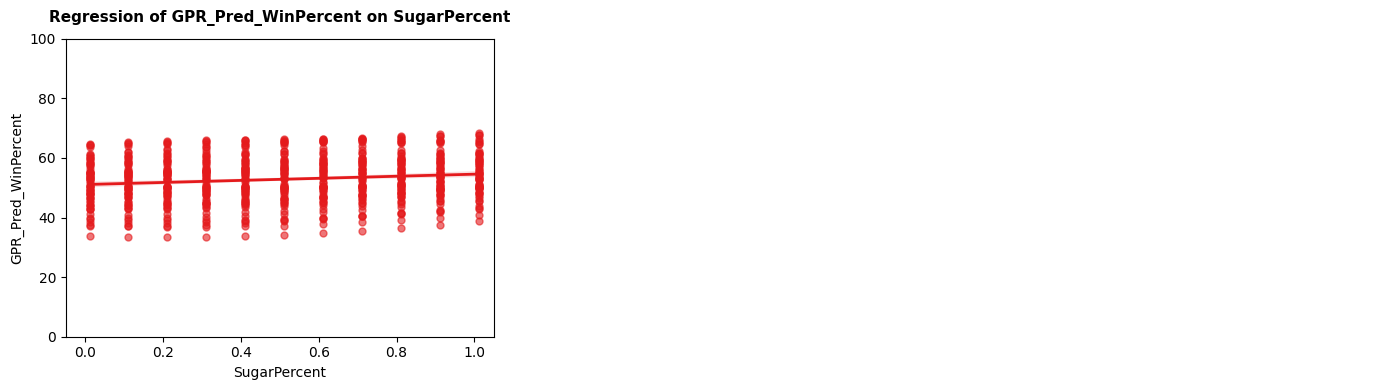

In [14]:
palette = sns.color_palette("Set1", n_colors=len(SelectedContinuousFeats))
colors_dict = {
    col: palette[i]
    for i, col in enumerate(SelectedContinuousFeats)
}
limits = {feature: [-0.05,1.05] for feature in SelectedContinuousFeats}
regplot_grid(design_space, SelectedContinuousFeats, 'GPR_Pred_WinPercent', 
             colors_dict, x_limits_dict=limits, y_limits_dict={"GPR_Pred_WinPercent":[0, 100]})

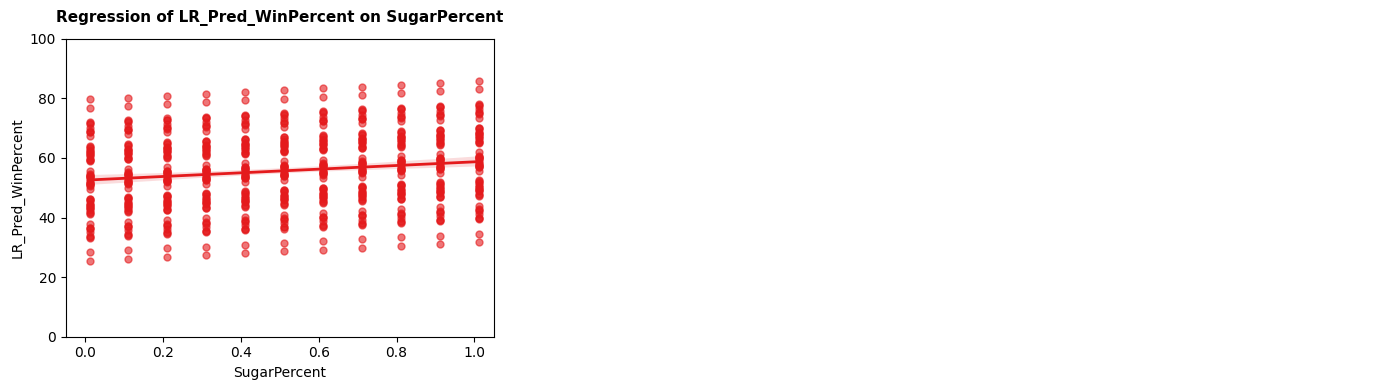

In [15]:
regplot_grid(design_space, SelectedContinuousFeats, 'LR_Pred_WinPercent', 
             colors_dict, x_limits_dict=limits, y_limits_dict={"LR_Pred_WinPercent":[0, 100]})

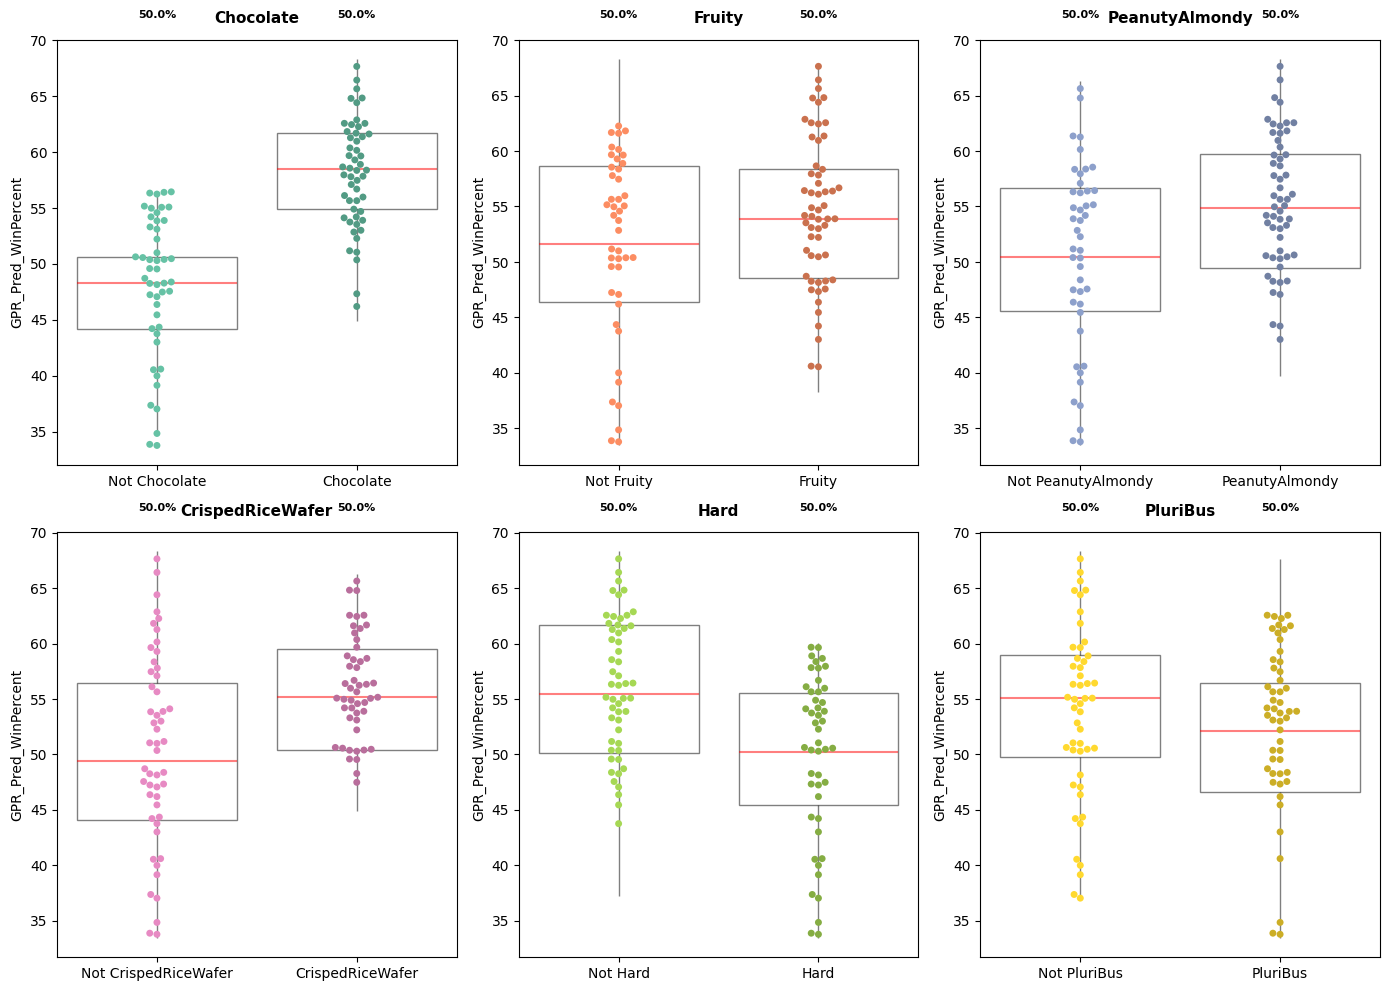

In [16]:
binary_columns = SelectedFlavourFeats + SelectedFormFeats

labels_dict = {
    col: [f"Not {col}", col] 
    for col in binary_columns
}
palette = sns.color_palette("Set2", n_colors=len(binary_columns))
def darken(color, amount=0.8): 
    r, g, b = color
    return (r * amount, g * amount, b * amount)

colors_dict = {
    col: [palette[i], darken(palette[i])]  # same palette but two shades
    for i, col in enumerate(binary_columns)
}

swarm_grid(design_space, binary_columns, 'GPR_Pred_WinPercent', 
           labels_dict, colors_dict, max_cols=3, figsize=(14, 5), sample_swarm_size=100)

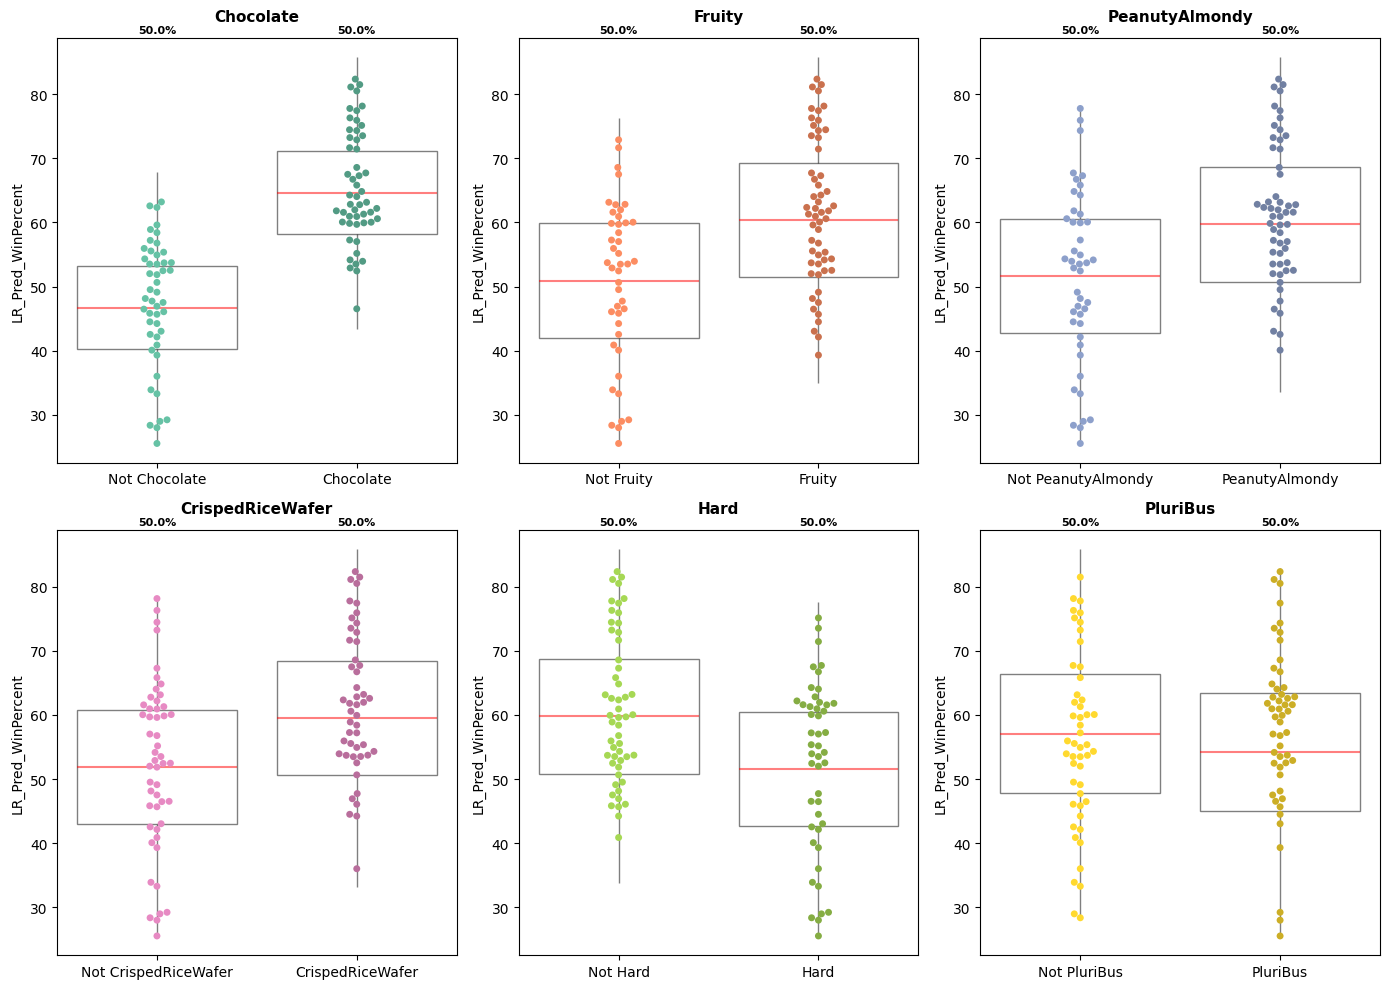

In [17]:
swarm_grid(design_space, binary_columns, 'LR_Pred_WinPercent', 
           labels_dict, colors_dict, max_cols=3, figsize=(14, 5), sample_swarm_size=100)

In [18]:
corr = design_space[SelectedFeatures + ['GPR_Pred_WinPercent']].corr(method='pearson')['GPR_Pred_WinPercent']
corr.loc[corr.abs().sort_values(ascending=False).index]

GPR_Pred_WinPercent    1.000000
Chocolate              0.706543
Hard                  -0.395378
CrispedRiceWafer       0.348679
PeanutyAlmondy         0.236242
PluriBus              -0.187738
SugarPercent           0.144637
Fruity                 0.114672
Name: GPR_Pred_WinPercent, dtype: float64

In [19]:
design_space[(design_space['Fruity'] == 1) & 
             (design_space[SelectedBooleanFeats].sum(axis=1) == 2)].groupby(SelectedBooleanFeats).agg(
            MaxWinPercent=("GPR_Pred_WinPercent", "max"), MeanWinPercent=("GPR_Pred_WinPercent", "mean") ).reset_index()

,Chocolate,Fruity,PeanutyAlmondy,CrispedRiceWafer,Hard,PluriBus,MaxWinPercent,MeanWinPercent
0,0,1,0,0,0,1,50.068976,46.473569
1,0,1,0,0,1,0,42.803039,40.184342
2,0,1,0,1,0,0,56.453833,56.337379
3,0,1,1,0,0,0,54.510684,51.479072
4,1,1,0,0,0,0,61.625675,58.476888


In [20]:
base_exploration_df = design_space[
    (design_space['Fruity'] == 1) &
    (design_space[SelectedBooleanFeats].sum(axis=1) == 2)
]

idx = (
    base_exploration_df.groupby(SelectedBooleanFeats)['GPR_Pred_WinPercent']
        .idxmax()
)
exploration_df = base_exploration_df.loc[idx].reset_index(drop=True)
exploration_df

,Chocolate,Fruity,PeanutyAlmondy,CrispedRiceWafer,Hard,PluriBus,SugarPercent,CompoundID,LR_Pred_WinPercent,GPR_Pred_WinPercent,GPR_Pred_WinPercent_Std,GPR_Pred_Rank,LR_Pred_Rank
0,0,1,0,0,0,1,1.011,DS_197,49.376066,50.068976,10.924502,448.0,468.0
1,0,1,0,0,1,0,1.011,DS_208,44.001351,42.803039,11.444461,638.0,573.0
2,0,1,0,1,0,0,0.411,DS_224,56.165868,56.453833,13.120266,225.0,341.0
3,0,1,1,0,0,0,1.011,DS_274,60.225939,54.510684,12.797141,312.0,262.0
4,1,1,0,0,0,0,1.011,DS_538,70.113000,61.625675,11.948756,90.0,98.0


In [21]:
exploitation_df = design_space.sort_values(by='GPR_Pred_Rank').head(1)
exploitation_df

,Chocolate,Fruity,PeanutyAlmondy,CrispedRiceWafer,Hard,PluriBus,SugarPercent,CompoundID,LR_Pred_WinPercent,GPR_Pred_WinPercent,GPR_Pred_WinPercent_Std,GPR_Pred_Rank,LR_Pred_Rank
450,1,0,1,0,0,0,1.011,DS_450,68.670182,68.309699,11.304337,1.0,115.0


In [22]:
selection_df = pd.concat([exploration_df, exploitation_df], ignore_index=True)
selection_df['Recommended'] = 1
design_space = design_space.merge(selection_df[SelectedFeatures + ['Recommended']], on=SelectedFeatures, how='left')
design_space['Recommended'] = design_space['Recommended'].fillna(0)
design_space[design_space['Recommended'] == 1]

,Chocolate,Fruity,PeanutyAlmondy,CrispedRiceWafer,Hard,PluriBus,SugarPercent,CompoundID,LR_Pred_WinPercent,GPR_Pred_WinPercent,GPR_Pred_WinPercent_Std,GPR_Pred_Rank,LR_Pred_Rank,Recommended
0,1,0,1,0,0,0,1.011,DS_450,68.670182,68.309699,11.304337,1.0,115.0,1.0
89,1,1,0,0,0,0,1.011,DS_538,70.113000,61.625675,11.948756,90.0,98.0,1.0
224,0,1,0,1,0,0,0.411,DS_224,56.165868,56.453833,13.120266,225.0,341.0,1.0
311,0,1,1,0,0,0,1.011,DS_274,60.225939,54.510684,12.797141,312.0,262.0,1.0
447,0,1,0,0,0,1,1.011,DS_197,49.376066,50.068976,10.924502,448.0,468.0,1.0
637,0,1,0,0,1,0,1.011,DS_208,44.001351,42.803039,11.444461,638.0,573.0,1.0


In [23]:
design_space['source'] = 'design_space'
df['source'] = 'exp_data'
df.loc[:, ['LR_Pred_WinPercent']] = MlModelPredictor().predict(df, SelectedFeatures, lr_model_experiment.model, 
                           lr_model_experiment.standard_scaler)
df.loc[:, 'GPR_Pred_WinPercent'], df.loc[:,'GPR_Pred_WinPercent_Std'] = MlModelPredictor().predict(df, SelectedFeatures, gpr_model_experiment.model, 
                           gpr_model_experiment.standard_scaler, return_std=True)
merged_df = pd.concat([df, design_space], ignore_index=True)

c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\sanch\OneDrive\Desktop\LDSN\Lidl Case Study\candy-case-study\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [24]:
merged_df = TSNEVisualiser().fit_data(merged_df, SelectedFeatures)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 789 samples in 0.004s...
[t-SNE] Computed neighbors for 789 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 789 / 789
[t-SNE] Mean sigma: 1.213654
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 67.3565369, gradient norm = 0.0000002 (50 iterations in 0.093s)
[t-SNE] Iteration 100: error = 66.9564896, gradient norm = 0.0000000 (50 iterations in 0.054s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 66.956490
[t-SNE] Iteration 150: error = 1.0406048, gradient norm = 0.0186645 (50 iterations in 0.083s)
[t-SNE] Iteration 200: error = 0.8350919, gradient norm = 0.0108403 (50 iterations in 0.082s)
[t-SNE] Iteration 250: error = 0.7748065, gradient norm = 0.0077185 (50 iterations in 0.110s)
[t-SNE] Iteration 300: error = 0.7567713, gradient norm = 0.0047904 (50 iterations in 0.086s)
[t-SNE] Iterati

Text(0.5, 1.0, 'Win Percent in 2 Dimensions')

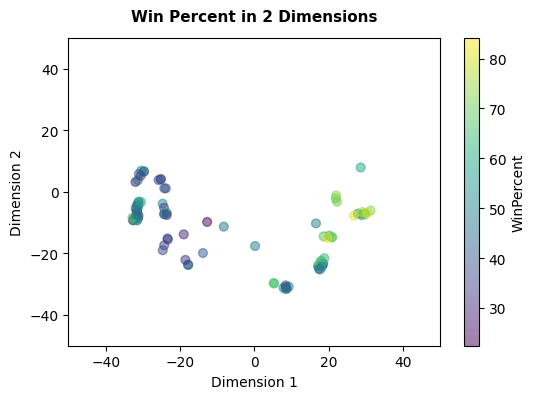

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['WinPercent'],
    cmap='viridis',
    alpha=0.5,
    s=40
)
# Colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('WinPercent')
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_title(f"Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'GPR Predicted Win Percent in 2 Dimensions')

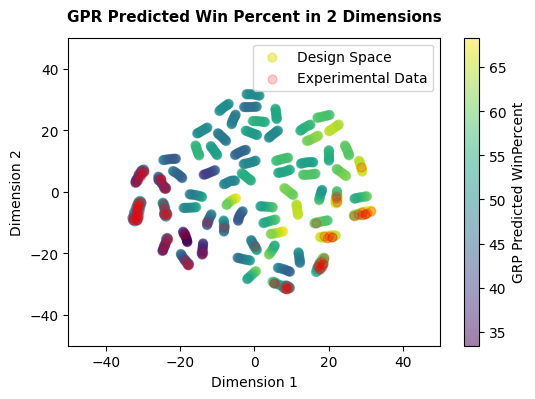

In [36]:
fig, ax = plt.subplots(figsize=(6,4))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['GPR_Pred_WinPercent'],
    cmap='viridis',
    alpha=0.5,
    s=40,
    label = 'Design Space'
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='red',     
    alpha=0.2,
    s=40,
    label = 'Experimental Data'
)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('GRP Predicted WinPercent')
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.legend(loc='upper right')
ax.set_title(f"GPR Predicted Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'GPR Predicted Win Percent in 2 Dimensions')

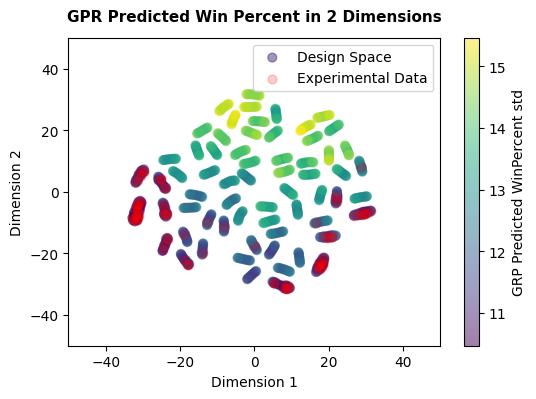

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['GPR_Pred_WinPercent_Std'],
    cmap='viridis',
    alpha=0.5,
    s=40,
    label = 'Design Space'
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='red',     
    alpha=0.2,
    s=40,
    label = 'Experimental Data'
)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('GRP Predicted WinPercent std')
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.legend(loc='upper right')
ax.set_title(f"GPR Predicted Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'LR Predicted Win Percent in 2 Dimensions')

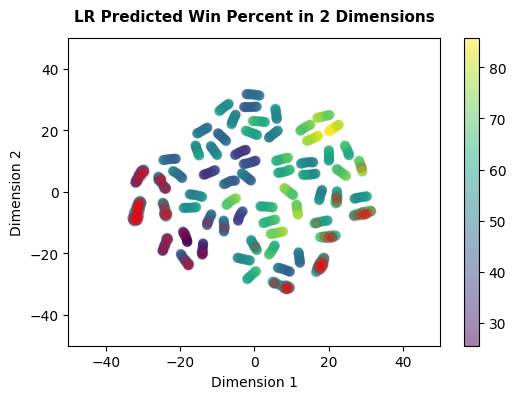

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    c=merged_df['LR_Pred_WinPercent'],
    cmap='viridis',
    alpha=0.5,
    s=40
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='red',     
    alpha=0.2,
    s=40,
)
cbar.set_label('LR Predicted WinPercent')
cbar = plt.colorbar(sc, ax=ax)
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_title(f"LR Predicted Win Percent in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)

Text(0.5, 1.0, 'Recommendations in 2 Dimensions')

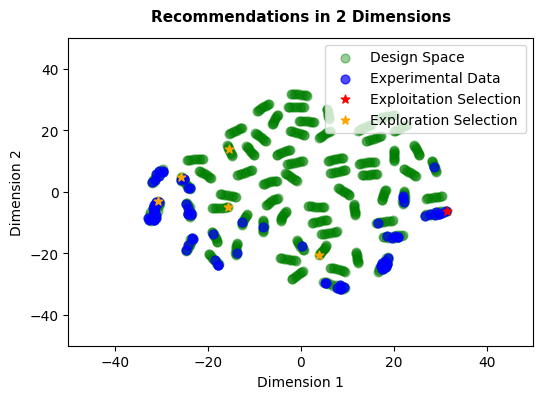

In [32]:
fig, ax = plt.subplots(figsize=(6,4))
sc = ax.scatter(
    merged_df['projection_x'],
    merged_df['projection_y'],
    color='green',
    alpha=0.4,
    s=40,
    label ='Design Space'
)

ax.scatter(
    merged_df[merged_df['source'] == 'exp_data']['projection_x'],
    merged_df[merged_df['source'] == 'exp_data']['projection_y'],
    color='blue',     
    alpha=0.7,
    s=40,
    label='Experimental Data'
)

exploitation_selection = merged_df[(merged_df['Recommended'] == 1) & 
                                   merged_df['CompoundID'].isin(['DS_450'])]
ax.scatter(
    exploitation_selection['projection_x'],
    exploitation_selection['projection_y'],
    color='red',     
    alpha=1,
    s=40,
    marker='*',
    label='Exploitation Selection'
)

exploration_selection = merged_df[(merged_df['Recommended'] == 1) & 
                                   merged_df['CompoundID'].isin(['DS_538', 'DS_224', 'DS_274', 'DS_197', 'DS_208'])]
ax.scatter(
    exploration_selection['projection_x'],
    exploration_selection['projection_y'],
    color='orange',     
    alpha=1,
    s=40,
    marker='*',
    label='Exploration Selection'
)

ax.legend(loc='upper right')
# # Labels and limits
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_title(f"Recommendations in 2 Dimensions", fontweight="bold", fontsize=11, pad=12)